In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [7]:
def unpack_acc(directory_path, communicator, epoch=200, datatype='consensus-average', num_tests=5):

    # Enter provided dictionary
    directory = os.path.join(directory_path)
    # Initialize consensus accuracy data matrix for algorithm
    data = np.zeros((num_tests, epoch))

    for root, dirs, files in os.walk(directory):
        # Iterate through all folders in IID/Non-IID Data Folder
        for dir in dirs:
            # Enter sub-folder if it is the communicator we are looking for
            if dir.startswith(communicator):
                test = int(dir[-11]) - 1
                new_directory_path = directory_path + '/' + dir
                new_directory = os.path.join(new_directory_path)
                for root, dirs, files in os.walk(new_directory):
                    for file in files:
                        if file.startswith(datatype):
                            f = open(new_directory_path + '/' + file, 'r')
                            i = 0
                            for line in f:
                                data[test, i] = line
                                i += 1
    return data, np.average(data, axis=0)

In [59]:
# communicators = ['run-async-iid-5sgdmax-1', 'run-async-iid-5sgdmax-2', 'run-async-pers-iid-5sgdmax-1', 
                 # 'run-async-pers-iid-5sgdmax-2', 'run-dsgd', 'run-pdsgd', 'run-ldsgd']
# labels = ['Ad-FL (1 SGD)', 'Ad-FL (2 SGD)', 'Pad-FL (1 SGD)', 'Pad-FL (2 SGD)', 'D-SGD', 'PD-SGD', 'LD-SGD']
epochs = 200
size = 5

[84.312 84.256 84.298 84.238 84.264]
[85.45  85.478 85.434 85.392 85.45 ]
[85.23  85.25  85.28  85.25  85.134]
[85.87  85.87  86.026 85.932 85.876]
[84.636 84.562 84.476 84.542 84.474]


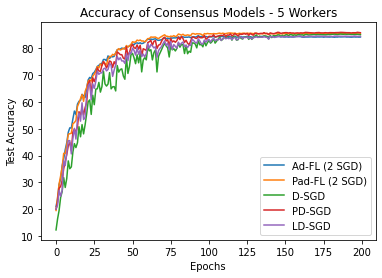

In [74]:
communicators = ['run-async-iid-5sgdmax-2', 'run-async-pers-iid-5sgdmax-2', 'run-dsgd', 'run-pdsgd', 'run-ldsgd']
labels = ['Ad-FL (2 SGD)', 'Pad-FL (2 SGD)', 'D-SGD', 'PD-SGD', 'LD-SGD']
epochs = 200
size = 5
# Fully IID Data Plots
i = 0
for comm in communicators:
    acc_data, avg_acc_data = unpack_acc('Output/Test-IID', communicator=comm)
    avg_max_acc = np.average(np.max(acc_data, axis=1))
    x=range(epochs)
    plt.plot(x, avg_acc_data, label=labels[i])
    plt.xlabel('Epochs')
    plt.ylabel('Test Accuracy') 
    plt.title('Accuracy of Consensus Models - '+str(size)+' Workers')
    plt.legend()
    i += 1
    print(avg_acc_data[-5:])
plt.show()    

[80.018 79.488 80.204 79.912 80.124]
[78.98  78.524 79.05  79.046 79.   ]
[78.666 77.65  78.516 78.424 78.686]
[80.158 79.288 80.008 80.092 80.252]
[80.224 79.554 80.396 80.336 80.566]


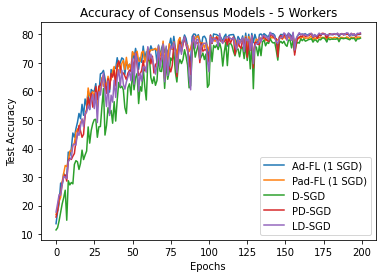

In [76]:
communicators = ['run-async-1-noniid-5sgdmax-1', 'run-async-pers-1-noniid-5sgdmax-1', 'run-dsgd', 'run-pdsgd', 'run-ldsgd']
labels = ['Ad-FL (1 SGD)', 'Pad-FL (1 SGD)', 'D-SGD', 'PD-SGD', 'LD-SGD']
# Fully Non-IID Data Plots
i = 0
for comm in communicators:
    acc_data, avg_acc_data = unpack_acc('Output/Test-NonIID-1', communicator=comm)
    avg_max_acc = np.average(np.max(acc_data, axis=1))
    x=range(epochs)
    plt.plot(x, avg_acc_data, label=labels[i])
    plt.xlabel('Epochs')
    plt.ylabel('Test Accuracy') 
    plt.title('Accuracy of Consensus Models - '+str(size)+' Workers')
    plt.legend()
    i += 1
    print(avg_acc_data[-5:])
plt.show()   

78.368
79.262
77.596
79.32000000000001
78.504


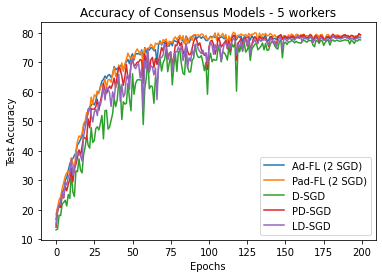

In [67]:
communicators = ['run-async-0.75-noniid-5sgdmax-2', 'run-async-pers-0.75-noniid-5sgdmax-2', 'run-dsgd', 'run-pdsgd', 'run-ldsgd']
labels = ['Ad-FL (2 SGD)', 'Pad-FL (2 SGD)', 'D-SGD', 'PD-SGD', 'LD-SGD']
epochs = 200
size = 5
# Non-IID (0.75 Degree) Data Plots
i = 0
for comm in communicators:
    acc_data, avg_acc_data = unpack_acc('Output/Test-NonIID-0.75', communicator=comm)
    avg_max_acc = np.average(np.max(acc_data, axis=1))
    x=range(epochs)
    plt.plot(x, avg_acc_data, label=labels[i])
    plt.xlabel('Epochs')
    plt.ylabel('Test Accuracy') 
    plt.title('Accuracy of Consensus Models - '+str(size)+' Workers')
    plt.legend()
    i += 1
    print(avg_acc_data[-5:])
plt.show()

[78.178 78.006 78.086 78.224 78.19 ]
[78.802 78.88  78.994 78.378 78.84 ]
[76.    76.576 76.138 76.316 76.44 ]
[78.644 79.22  79.032 79.05  79.222]
[78.462 78.646 78.476 78.5   78.592]


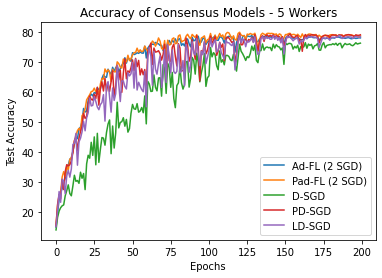

In [73]:
communicators = ['run-async-0.5-noniid-5sgdmax-2', 'run-async-pers-0.5-noniid-5sgdmax-2', 'run-dsgd', 'run-pdsgd', 'run-ldsgd']
labels = ['Ad-FL (2 SGD)', 'Pad-FL (2 SGD)', 'D-SGD', 'PD-SGD', 'LD-SGD']
epochs = 200
size = 5
# Non-IID (0.5 Degree) Data Plots
i = 0
for comm in communicators:
    acc_data, avg_acc_data = unpack_acc('Output/Test-NonIID-0.5', communicator=comm)
    avg_max_acc = np.average(np.max(acc_data, axis=1))
    x=range(epochs)
    plt.plot(x, avg_acc_data, label=labels[i])
    plt.xlabel('Epochs')
    plt.ylabel('Test Accuracy') 
    plt.title('Accuracy of Consensus Models - '+str(size)+' Workers')
    plt.legend()
    i += 1
    print(avg_acc_data[-5:])
plt.show()